In [111]:
import pandas as pd

df=pd.read_csv("output_results.csv")
df5=df["pid"]
df5

0       b78b8374-6a9e-4178-a748-70b7a4f114ba
1       95dde865-2ae6-4d5c-8dab-2e32bd9196c3
2       b49204e2-f159-404c-9d4e-ae54b08359d0
3       63c47918-6fc0-46e1-a5d4-e7cf2e870aee
4       a22bd4eb-2f1b-4b46-8c7f-429070e2dbaf
                        ...                 
1089    516a33ab-f448-4a39-bfaa-d1765e6aca11
1090    76be271a-1c41-43ee-96cb-fd7fba801be2
1091    4407d3ce-1cec-4cab-91b9-a83651f4b952
1092    e002d5c8-e0eb-42c1-9e2f-17a1537435cc
1093    2c920885-c7af-40ad-8073-c52f458ac39d
Name: pid, Length: 1094, dtype: object

In [112]:
df1=df.drop("star_ratings",axis=1)

In [113]:
df1
data=df1.drop("pid",axis=1)
data

,polarity_positive,polarity_negative,polarity_neutral
0,0.712465,0.200216,0.000000
1,0.365292,0.486662,0.000000
2,0.568471,0.229685,0.050393
3,0.582197,0.229700,0.044789
4,0.370718,0.553693,0.000000
...,...,...,...
1089,0.847972,0.119036,0.000000
1090,0.710783,0.210677,0.000000
1091,0.696256,0.216751,0.000000
1092,0.541754,0.341446,0.000000


In [114]:
df1["polarity_neutral"].value_counts()

0.000000    824
0.059367     21
0.050393     21
0.061687     18
0.061180     15
0.052292     15
0.062734     14
0.051026     14
0.046712     13
0.051883     13
0.049481     12
0.049842     12
0.044789     11
0.062221     10
0.060308     10
0.056159     10
0.062701      9
0.051379      8
0.110746      3
0.123907      2
0.123401      2
0.102685      2
0.097105      1
0.111168      1
0.123009      1
0.112599      1
0.165643      1
0.115526      1
0.119674      1
0.110701      1
0.101221      1
0.094632      1
0.112214      1
0.117339      1
0.113063      1
0.117846      1
0.122361      1
0.109446      1
0.114616      1
0.101772      1
0.107892      1
0.111250      1
0.113066      1
0.111574      1
0.112207      1
0.101725      1
0.123374      1
0.113979      1
0.101363      1
0.164496      1
0.102405      1
0.123914      1
0.108848      1
0.103262      1
0.105097      1
0.185230      1
0.122101      1
Name: polarity_neutral, dtype: int64

In [115]:
df1["polarity_negative"].value_counts()

0.000000    50
0.118382     9
0.117962     7
0.114782     6
0.113456     5
            ..
0.178631     1
0.189340     1
0.189394     1
0.181715     1
0.341446     1
Name: polarity_negative, Length: 928, dtype: int64

In [116]:
df2=df1["polarity_positive"]
df2

0       0.712465
1       0.365292
2       0.568471
3       0.582197
4       0.370718
          ...   
1089    0.847972
1090    0.710783
1091    0.696256
1092    0.541754
1093    0.729995
Name: polarity_positive, Length: 1094, dtype: float64

In [117]:
from matplotlib import pyplot as plt

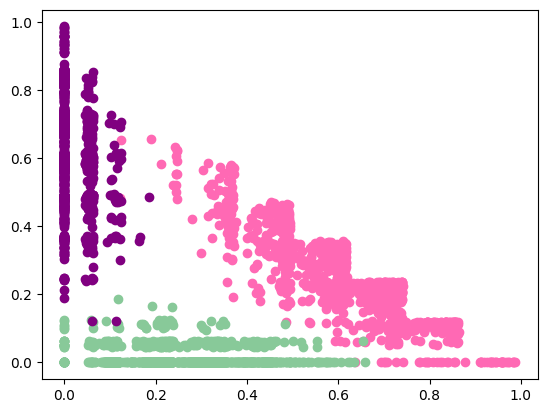

In [118]:
x = df1["polarity_positive"]
y = df1["polarity_negative"]
z = df1["polarity_neutral"]

plt.scatter(x, y,color="hotpink")
plt.scatter(y,z,color="#88c999")
plt.scatter(z,x,color="purple")
plt.show()

In [119]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [120]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your data is stored in a DataFrame named 'data'
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

data['Cluster'] = clusters 

# Calculate average polarity scores for each cluster
cluster_means = data.groupby('Cluster').mean()

# Map clusters to pseudo-star ratings
pseudo_star_ratings = cluster_means['polarity_positive'].rank().astype(int)

# Create a mapping dictionary
cluster_to_pseudo_star = dict(zip(cluster_means.index, pseudo_star_ratings))

# Add pseudo-star ratings to the original data
data['Pseudo_Star_Rating'] = data['Cluster'].map(cluster_to_pseudo_star)

c:\Users\prisha gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [121]:
data

,polarity_positive,polarity_negative,polarity_neutral,Cluster,Pseudo_Star_Rating
0,0.712465,0.200216,0.000000,0,3
1,0.365292,0.486662,0.000000,4,2
2,0.568471,0.229685,0.050393,2,4
3,0.582197,0.229700,0.044789,2,4
4,0.370718,0.553693,0.000000,4,2
...,...,...,...,...,...
1089,0.847972,0.119036,0.000000,3,5
1090,0.710783,0.210677,0.000000,0,3
1091,0.696256,0.216751,0.000000,0,3
1092,0.541754,0.341446,0.000000,0,3


In [122]:
def pre_star(postive_polarity):
    ratings = postive_polarity * 5
    return round(ratings, 1)

In [123]:
stars = []

for ind in data.index:
    a = pre_star(df2[ind])
    stars.append(a)

stars

data["stars"]=pd.DataFrame(stars)
data

,polarity_positive,polarity_negative,polarity_neutral,Cluster,Pseudo_Star_Rating,stars
0,0.712465,0.200216,0.000000,0,3,3.6
1,0.365292,0.486662,0.000000,4,2,1.8
2,0.568471,0.229685,0.050393,2,4,2.8
3,0.582197,0.229700,0.044789,2,4,2.9
4,0.370718,0.553693,0.000000,4,2,1.9
...,...,...,...,...,...,...
1089,0.847972,0.119036,0.000000,3,5,4.2
1090,0.710783,0.210677,0.000000,0,3,3.6
1091,0.696256,0.216751,0.000000,0,3,3.5
1092,0.541754,0.341446,0.000000,0,3,2.7


In [124]:
df4=data[["polarity_positive","stars"]]
df4
df4["pid"]=df5
df4

C:\Users\prisha gupta\AppData\Local\Temp\ipykernel_7448\1673832220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["pid"]=df5


,polarity_positive,stars,pid
0,0.712465,3.6,b78b8374-6a9e-4178-a748-70b7a4f114ba
1,0.365292,1.8,95dde865-2ae6-4d5c-8dab-2e32bd9196c3
2,0.568471,2.8,b49204e2-f159-404c-9d4e-ae54b08359d0
3,0.582197,2.9,63c47918-6fc0-46e1-a5d4-e7cf2e870aee
4,0.370718,1.9,a22bd4eb-2f1b-4b46-8c7f-429070e2dbaf
...,...,...,...
1089,0.847972,4.2,516a33ab-f448-4a39-bfaa-d1765e6aca11
1090,0.710783,3.6,76be271a-1c41-43ee-96cb-fd7fba801be2
1091,0.696256,3.5,4407d3ce-1cec-4cab-91b9-a83651f4b952
1092,0.541754,2.7,e002d5c8-e0eb-42c1-9e2f-17a1537435cc


In [125]:
from pymongo import MongoClient

CONNECTION_STRING = "mongodb://localhost:27017"
client = MongoClient(CONNECTION_STRING)
db = client["florence"]
collection = db["newproducts"]

In [148]:
from pymongo import UpdateOne


opr = []
for ind in df4.index:
    pid = df4.at[ind, "pid"]
    ap = UpdateOne(
        {"id": pid},
        {
            "$set": {
                "starRatings": df4.at[ind, "stars"],
                "positive_polarity": round(df4.at[ind, "polarity_positive"], 2),
            }
        },
    )
    opr.append(ap)


collection.bulk_write(opr)